## This dataset contains sales and profit information from a stores order history between January 2014 and December 2017

In [42]:
# Dataset: Superstore Dataset BY VIVEK CHOWDHURY
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
warnings.filterwarnings('ignore')

data = pd.read_csv("C:/Users/pc/OneDrive/Documents/Jupyter Projects/Superstore_dataset.csv", encoding='latin-1')
pd.set_option('display.max_columns', None)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [43]:
def dataframe_info(df):
    temp = pd.DataFrame(index=df.columns)
    temp["Datatype"] = df.dtypes
    temp["Not null values"] = df.count()
    temp["Null values"] = df.isnull().sum()
    temp["Percentage of Null values"] = (df.isnull().mean())*100
    temp["Unique count"] = df.nunique()
    return temp
dataframe_info(data)

,Datatype,Not null values,Null values,Percentage of Null values,Unique count
Row ID,int64,9994,0,0.0,9994
Order ID,object,9994,0,0.0,5009
Order Date,object,9994,0,0.0,1237
Ship Date,object,9994,0,0.0,1334
Ship Mode,object,9994,0,0.0,4
Customer ID,object,9994,0,0.0,793
Customer Name,object,9994,0,0.0,793
Segment,object,9994,0,0.0,3
Country,object,9994,0,0.0,1
City,object,9994,0,0.0,531


In [44]:
data['Order Date'] = data['Order Date'].astype('datetime64')
data['Ship Date'] = data['Ship Date'].astype('datetime64')

## Order Month, Year, Day of Week

In [45]:
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order day of week'] = data['Order Date'].dt.weekday
oldest_order = data['Order Date'].min()
newest_order = data['Order Date'].max()
print(oldest_order)
print(newest_order)
delta = newest_order-oldest_order
print(delta)

2014-01-03 00:00:00
2017-12-30 00:00:00
1457 days 00:00:00


#### We have order data from January 2014 to the end of December 2017

## Sales and profit for each month

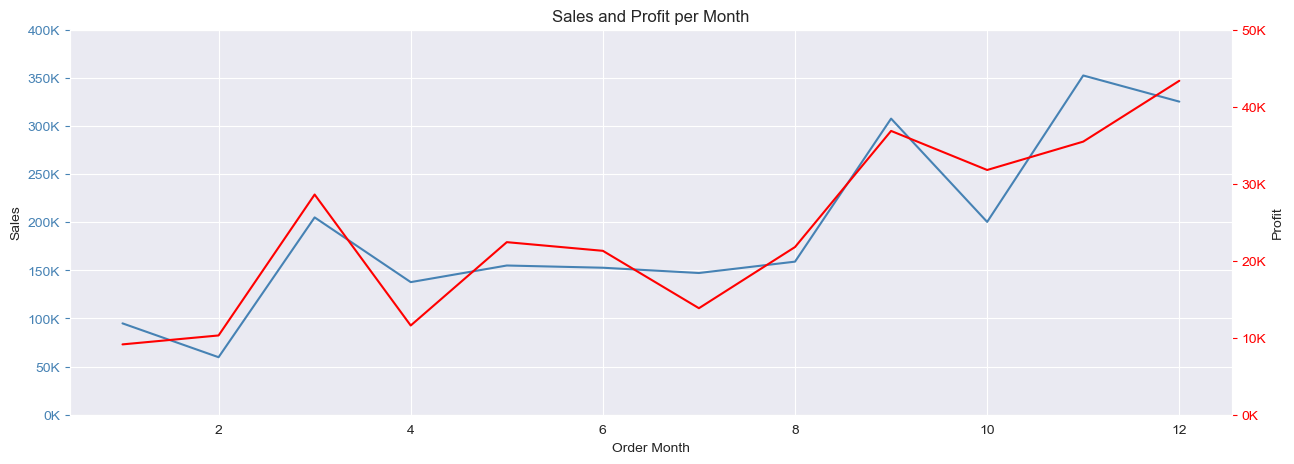

In [46]:
sales_per_month = data.groupby('Order Month').agg({'Sales':'sum'}).reset_index()
profit_per_month = data.groupby('Order Month').agg({'Profit':'sum'}).reset_index()

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(x='Order Month', y='Sales', data=sales_per_month, ax=ax, color='steelblue')
ax.set_ylim(0, 400000)
ax.set_title('Sales and Profit per Month')
ax.tick_params('y', colors='steelblue')
ax.set_yticklabels(['0K', '50K', '100K', '150K', '200K', '250K', '300K', '350K', '400K'])
ax2 = ax.twinx()
sns.lineplot(x='Order Month', y='Profit', data=profit_per_month, ax=ax2, color='red')
ax2.set_ylim(0, 50000)
ax2.tick_params('y', colors='red')
ax2.set_yticklabels(['0K', '10K', '20K','30K','40K','50K'])
ax2.grid(None)
plt.show()

#### Sales and profits seem to be higher in the latter stages of the year

## Sales and Profit per segment

       Segment         Sales       Profit
0     Consumer  1.161401e+06  134119.2092
1    Corporate  7.061464e+05   91979.1340
2  Home Office  4.296531e+05   60298.6785
       Segment variable         value
0     Consumer    Sales  1.161401e+06
1    Corporate    Sales  7.061464e+05
2  Home Office    Sales  4.296531e+05
3     Consumer   Profit  1.341192e+05
4    Corporate   Profit  9.197913e+04
5  Home Office   Profit  6.029868e+04


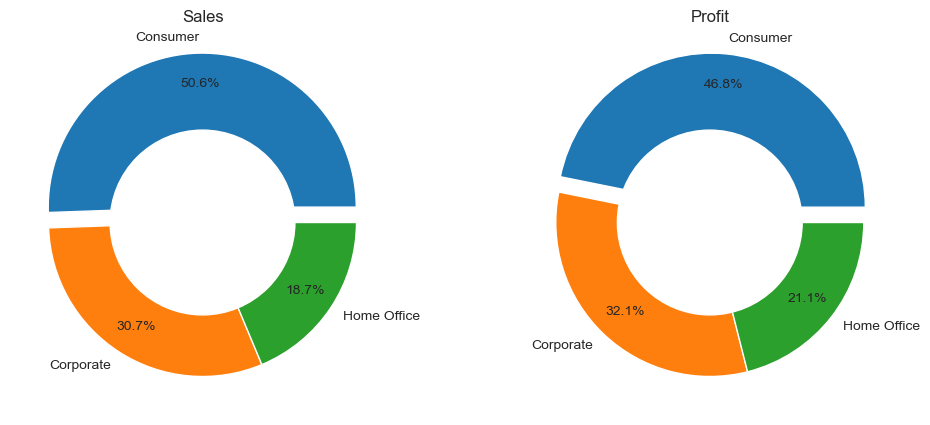

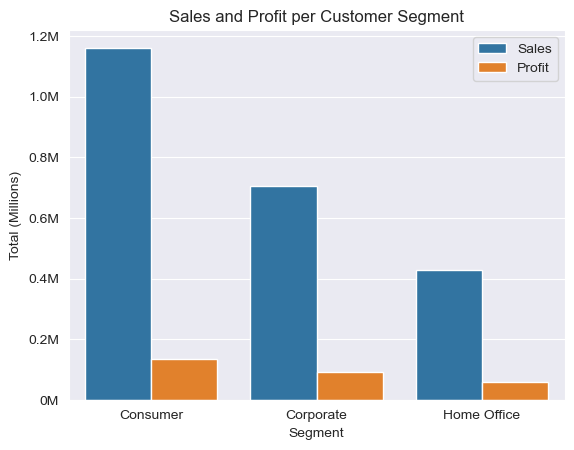

In [47]:
per_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit':'sum'}).reset_index()
print(per_segment)
# pd.melt allow you to unpivot a pivot table into a format you prefer
per_segment_melt = pd.melt(per_segment, id_vars = ['Segment'], value_vars=['Sales','Profit'])
print(per_segment_melt)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
explode = [0.1 if x == per_segment['Sales'].max() else 0 for x in per_segment['Sales']]
ax[0].pie(per_segment['Sales'], labels=per_segment['Segment'], autopct='%1.1f%%', pctdistance=0.8, explode = explode)
ax[0].set_title('Sales')
explode = [0.1 if x == per_segment['Profit'].max() else 0 for x in per_segment['Profit']]
ax[1].pie(per_segment['Profit'], labels=per_segment['Segment'], autopct='%1.1f%%', pctdistance=0.8, explode = explode)
ax[1].set_title('Profit')

centre_circle = plt.Circle((0,0),0.60,fc='white')
ax[0].add_artist(centre_circle)
centre_circle_1 = plt.Circle((0,0),0.60,fc='white')
ax[1].add_artist(centre_circle_1)

plt.show()

fig, ax = plt.subplots()
sns.barplot(x='Segment', y='value', hue='variable', data = per_segment_melt, ax=ax)
ax.legend(title = '')
ax.set_ylabel('Total (Millions)')
ax.set_yticklabels(['0M', '0.2M', '0.4M', '0.6M', '0.8M', '1.0M', '1.2M'])
ax.set_title('Sales and Profit per Customer Segment')
plt.show()

#### Store has higher sales and profits from products sales to consumers 

## Sales and profit per region

    Region        Sales       Profit
0  Central  501239.8908   39706.3625
1     East  678781.2400   91522.7800
2    South  391721.9050   46749.4303
3     West  725457.8245  108418.4489
    Region variable        value
0  Central    Sales  501239.8908
1     East    Sales  678781.2400
2    South    Sales  391721.9050
3     West    Sales  725457.8245
4  Central   Profit   39706.3625
5     East   Profit   91522.7800
6    South   Profit   46749.4303
7     West   Profit  108418.4489


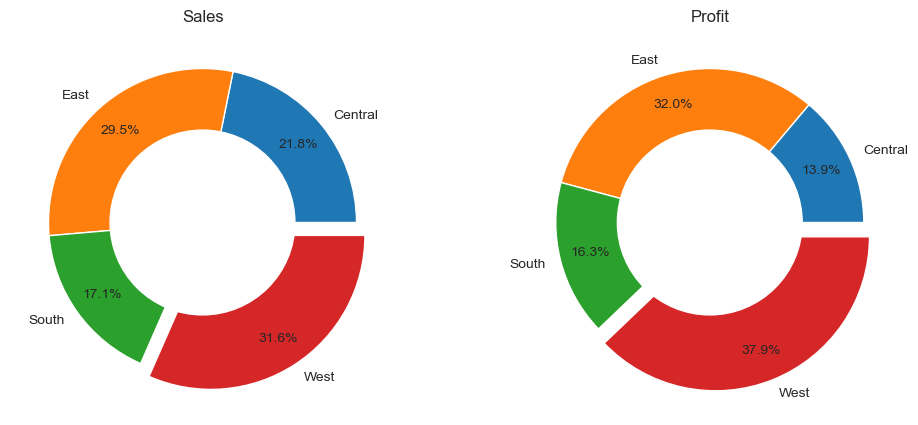

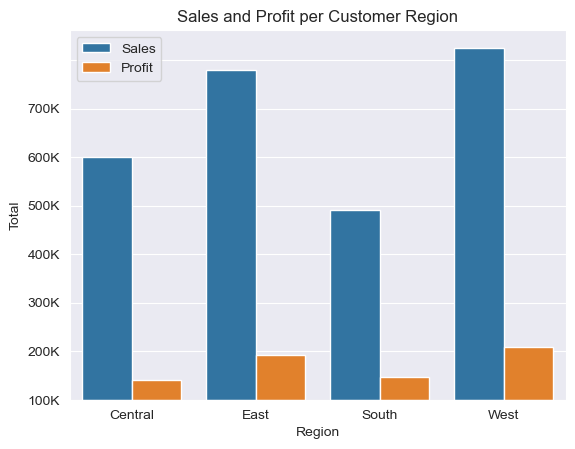

In [48]:
per_region = data.groupby('Region').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()
print(per_region)
per_region_melt = pd.melt(per_region, id_vars='Region', value_vars=['Sales','Profit'])
print(per_region_melt)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
explode = [0.1 if x == per_region['Sales'].max() else 0 for x in per_region['Sales']]
ax[0].pie(per_region['Sales'], labels=per_region['Region'], autopct='%1.1f%%', pctdistance=0.8, explode = explode)
ax[0].set_title('Sales')
explode = [0.1 if x == per_region['Profit'].max() else 0 for x in per_region['Profit']]
ax[1].pie(per_region['Profit'], labels=per_region['Region'], autopct='%1.1f%%', pctdistance=0.8, explode = explode)
ax[1].set_title('Profit')

centre_circle = plt.Circle((0,0),0.60,fc='white')
ax[0].add_artist(centre_circle)
centre_circle_1 = plt.Circle((0,0),0.60,fc='white')
ax[1].add_artist(centre_circle_1)

plt.show()

fig, ax=plt.subplots()
sns.barplot(x='Region', y='value', hue='variable', data=per_region_melt)
ax.legend(title = '')
ax.set_ylabel('Total')
ax.set_yticklabels(['100K','200K','300K','400K','500K','600K','700K'])
ax.set_title('Sales and Profit per Customer Region')
plt.show()

#### Customers from the West produce the most sales and profits

## Sales Analysis by Category

          Category        Sales
0        Furniture  741999.7953
1  Office Supplies  719047.0320
2       Technology  836154.0330
   Sub-Category        Sales
0   Accessories  167380.3180
1    Appliances  107532.1610
2           Art   27118.7920
3       Binders  203412.7330
4     Bookcases  114879.9963
5        Chairs  328449.1030
6       Copiers  149528.0300
7     Envelopes   16476.4020
8     Fasteners    3024.2800
9   Furnishings   91705.1640
10       Labels   12486.3120
11     Machines  189238.6310
12        Paper   78479.2060
13       Phones  330007.0540
14      Storage  223843.6080
15     Supplies   46673.5380
16       Tables  206965.5320


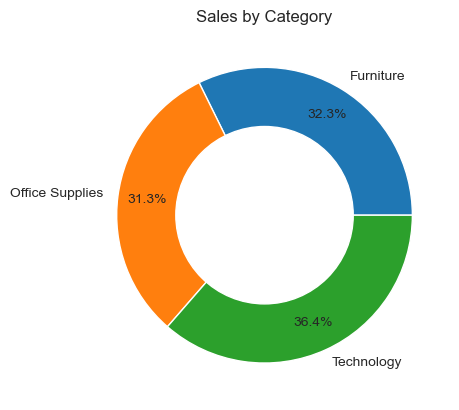

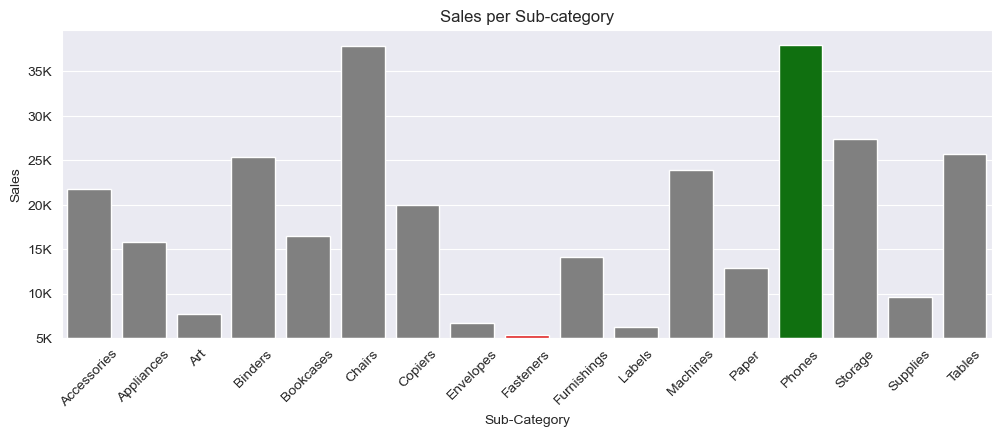

In [49]:
per_category = data.groupby('Category').agg({'Sales':'sum'}).reset_index()
print(per_category)
per_subcategory = data.groupby('Sub-Category').agg({'Sales':'sum'}).reset_index()
print(per_subcategory)

fig, ax = plt.subplots()
ax.pie(per_category['Sales'], labels=per_category['Category'], autopct='%1.1f%%', pctdistance=0.8)
centre_circle = plt.Circle((0,0),0.60,fc='white')
ax.set_title('Sales by Category')
ax.add_artist(centre_circle)
plt.show()

fig, ax = plt.subplots(figsize=(12,4))
cols = ['green' if x == per_subcategory['Sales'].max() else 'red' if x == per_subcategory['Sales'].min() else 'grey' for x in per_subcategory['Sales']]
sns.barplot(x='Sub-Category', y='Sales', data=per_subcategory, palette=cols)
ax.set_xticklabels(per_subcategory['Sub-Category'], rotation=45)
ax.set_yticklabels(['5K', '10K', '15K', '20K', '25K', '30K', '35K'])
ax.set_title('Sales per Sub-category')
plt.show()

#### Sales over each category are roughly the same
#### Sale of phones produces the most revenue whereas the sale of fasteners produces the least

## Profit Analysis by Category

          Category       Profit
0        Furniture   18451.2728
1  Office Supplies  122490.8008
2       Technology  145454.9481
   Sub-Category      Profit
0   Accessories  41936.6357
1    Appliances  18138.0054
2           Art   6527.7870
3       Binders  30221.7633
4     Bookcases  -3472.5560
5        Chairs  26590.1663
6       Copiers  55617.8249
7     Envelopes   6964.1767
8     Fasteners    949.5182
9   Furnishings  13059.1436
10       Labels   5546.2540
11     Machines   3384.7569
12        Paper  34053.5693
13       Phones  44515.7306
14      Storage  21278.8264
15     Supplies  -1189.0995
16       Tables -17725.4811


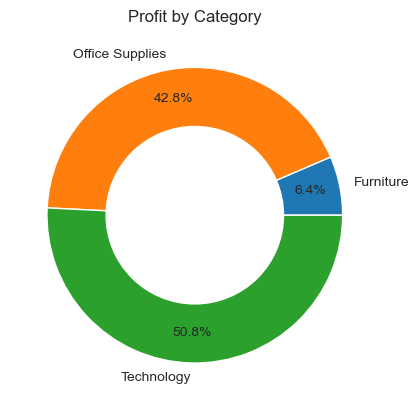

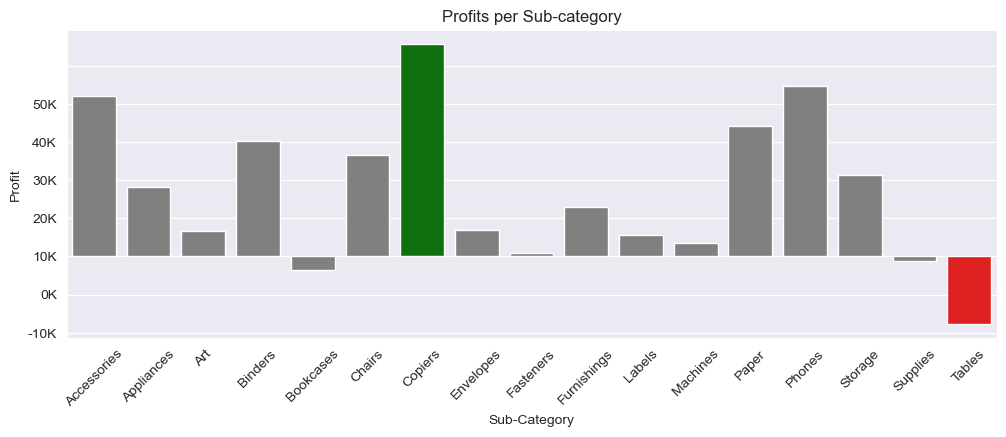

In [50]:
per_category = data.groupby('Category').agg({'Profit':'sum'}).reset_index()
print(per_category)
per_subcategory = data.groupby('Sub-Category').agg({'Profit':'sum'}).reset_index()
print(per_subcategory)

fig, ax = plt.subplots()
ax.pie(per_category['Profit'], labels=per_category['Category'], autopct='%1.1f%%', pctdistance=0.8)
centre_circle = plt.Circle((0,0),0.60,fc='white')
ax.set_title('Profit by Category')
ax.add_artist(centre_circle)
plt.show()

fig, ax = plt.subplots(figsize=(12,4))
cols = ['green' if x == per_subcategory['Profit'].max() else 'red' if x == per_subcategory['Profit'].min() else 'grey' for x in per_subcategory['Profit']]
sns.barplot(x='Sub-Category', y='Profit', data=per_subcategory, palette=cols)
ax.set_xticklabels(per_subcategory['Sub-Category'], rotation=45)
ax.set_yticklabels(['-20K','-10K','0K','10K','20K','30K','40K','50K'])
ax.set_title('Profits per Sub-category')
plt.show()

#### Profits mostly derive from the sale of technology and office supply products
#### Sale of copiers produces the most profit whilst the sale of tables results in a net loss

## Profit Margins

In [51]:
total_sales = data['Sales'].sum()
total_profits = data['Profit'].sum()

profit_margin = (total_profits/total_sales)*100
print(profit_margin)

12.467217240315604


#### 12% of all sales made between January 2014 and the end of December 2017 contributed towards the companies net profit

## Sales and profit per state

457687.6315
919.91


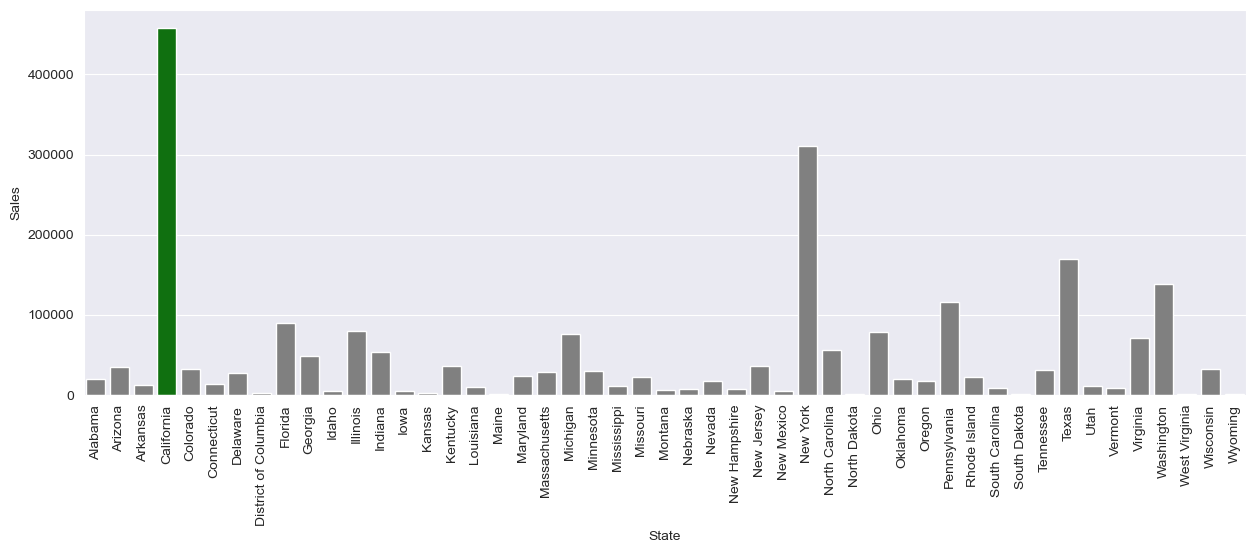

In [67]:
per_state_sales = data.groupby('State').agg({'Sales':'sum'})
print(per_state_sales['Sales'].max())

print(per_state_sales['Sales'].min())

fig, ax = plt.subplots(figsize=(15, 5))
cols=['green' if x == per_state_sales['Sales'].max() else 'red' if x == per_state_sales['Sales'].min() else 'grey' for x in per_state_sales['Sales']]
sns.barplot(x=per_state_sales.index, y='Sales', data=per_state_sales, palette=cols)
ax.set_xticklabels(per_state_sales.index, rotation=90)
plt.show()

Profit    76381.3871
dtype: float64
Profit   -25729.3563
dtype: float64


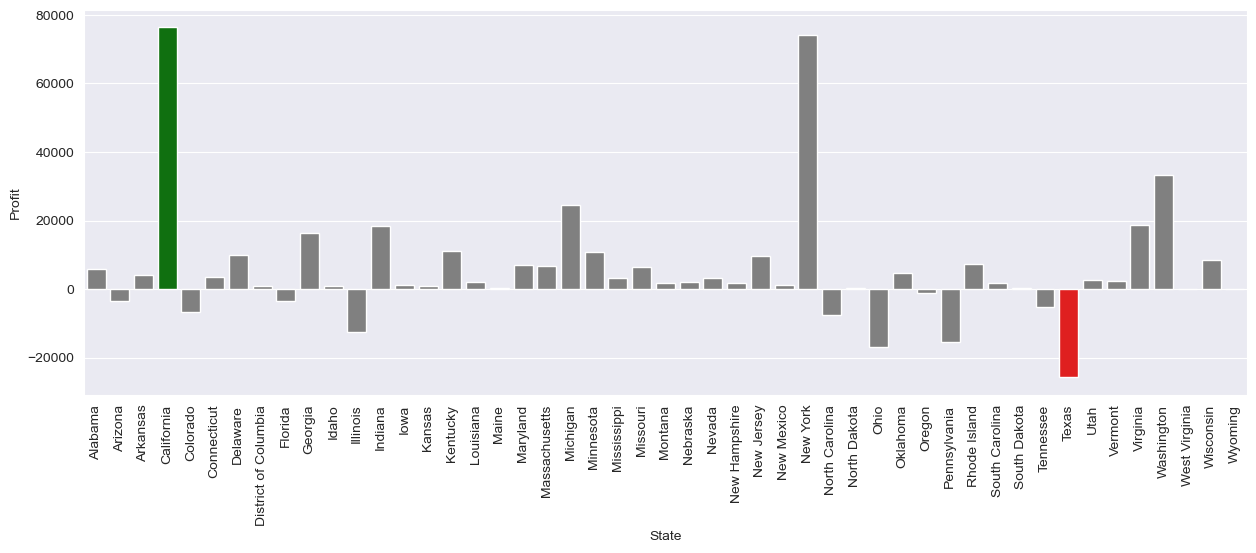

In [71]:
per_state_profit = data.groupby('State').agg({'Profit':'sum'})
print(per_state_profit.max())

print(per_state_profit.min())

fig, ax = plt.subplots(figsize=(15,5))
cols = ['green' if x == per_state_profit['Profit'].max() else 'red' if x == per_state_profit['Profit'].min() else 'grey' for x in per_state_profit['Profit']]
sns.barplot(x=per_state_profit.index, y='Profit', data=per_state_profit, palette=cols)
ax.set_xticklabels(per_state_profit.index, rotation=90)
plt.show()

#### Customers from the state of California produce the most sales and profit
#### Customers from North Dakota produced the least sales and those from Texas produced the least profit